In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

In [5]:
df = pd.read_csv("merged_final_customer.csv",low_memory=False)

In [6]:
df1 = pd.read_csv("JTD.csv")

In [7]:
merged_jtd_final_customer = df.merge(df1,left_on="Job Card No",right_on="DBM Order")

In [8]:
merged_jtd_final_customer.shape

(3039857, 50)

In [9]:
merged_jtd_final_customer.head()

Unnamed: 0_x Cust Type Customer No. Insurance Company Invoice Date  \
0             0    Retail        67849               NaN   2015-01-02   
1             0    Retail        67849               NaN   2015-01-02   
2             0    Retail        67849               NaN   2015-01-02   
3             0    Retail        67849               NaN   2015-01-02   
4             0    Retail        67849               NaN   2015-01-02   

   Job Card No JobCard Date JobCard Time  KMs Reading  Labour Total  \
0       168303   2014-12-13     14:29:43        49317       1203.14   
1       168303   2014-12-13     14:29:43        49317       1203.14   
2       168303   2014-12-13     14:29:43        49317       1203.14   
3       168303   2014-12-13     14:29:43        49317       1203.14   
4       168303   2014-12-13     14:29:43        49317       1203.14   

             Make  Misc Total  Model  OSL Total    Order Type  Parts Total  \
0  GENERAL MOTORS         0.0  SPARK     500.06  Paid Service      2348.75   
1  GENERAL MOTORS         0.0  SPARK     500.06  Paid Service      2348.75   
2  GENERAL MOTORS         0.0  SPARK     500.06  Paid Service      2348.75   
3  GENERAL MOTORS         0.0  SPARK     500.06  Paid Service      2348.75   
4  GENERAL MOTORS         0.0  SPARK     500.06  Paid Service      2348.75   

   Pin code Plant Plant Name1 Print Status  Recovrbl Exp Technician Name  \
0    400601  BC01       THANE           NO           0.0          RUPESH   
1    400601  BC01       THANE           NO           0.0          RUPESH   
2    400601  BC01       THANE           NO           0.0          RUPESH   
3    400601  BC01       THANE           NO           0.0          RUPESH   
4    400601  BC01       THANE           NO           0.0          RUPESH   

   Total Amt Wtd Tax.  Total Value  User ID     Invoice_DateTime  \
0             4051.95      4051.95  BC01FS1  2015-01-02 11:30:36   
1             4051.95      4051.95  BC01FS1  2015-01-02 11:30:36   
2             4051.95      4051.95  BC01FS1  2015-01-02 11:30:36   
3             4051.95      4051.95  BC01FS1  2015-01-02 11:30:36   
4             4051.95      4051.95  BC01FS1  2015-01-02 11:30:36   

      JobCard_DateTime                Service_Time   City        State  Year  \
0  2014-12-13 14:29:43  19 days 21:00:53.000000000  thane  maharashtra  2014   
1  2014-12-13 14:29:43  19 days 21:00:53.000000000  thane  maharashtra  2014   
2  2014-12-13 14:29:43  19 days 21:00:53.000000000  thane  maharashtra  2014   
3  2014-12-13 14:29:43  19 days 21:00:53.000000000  thane  maharashtra  2014   
4  2014-12-13 14:29:43  19 days 21:00:53.000000000  thane  maharashtra  2014   

   Month Business Partner  Partner Type Data Origin  Title  Marital Status  \
0     12            71941           1.0        Z007    2.0             NaN   
1     12            71941           1.0        Z007    2.0             NaN   
2     12            71941           1.0        Z007    2.0             NaN   
3     12            71941           1.0        Z007    2.0             NaN   
4     12            71941           1.0        Z007    2.0             NaN   

  Occupation Date of Birth Death date  Unnamed: 0_y  DBM Order  Order Item  \
0        NaN           NaN        NaN       4242115     168303          10   
1        NaN           NaN        NaN       4242116     168303          20   
2        NaN           NaN        NaN       4242117     168303          30   
3        NaN           NaN        NaN       4242118     168303          40   
4        NaN           NaN        NaN       4242119     168303          50   

       Material Labor Value Number                 Description Item Category  \
0  1EMJ96316634                NaN               BEARING OUTER          P002   
1  1EMJ96316635                NaN               BEARING INNER          P002   
2  FFSOIL200901                NaN  URANIA SUPREMO CI 4 15W 40          P002   
3  1EMJ25183779                NaN                  OIL FILTER 

In [10]:
merged_jtd_final_customer.columns

Index(['Unnamed: 0_x', 'Cust Type', 'Customer No.', 'Insurance Company',
       'Invoice Date', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total Value', 'User ID', 'Invoice_DateTime',
       'JobCard_DateTime', 'Service_Time', 'City', 'State', 'Year', 'Month',
       'Business Partner', 'Partner Type', 'Data Origin', 'Title',
       'Marital Status', 'Occupation', 'Date of Birth', 'Death date',
       'Unnamed: 0_y', 'DBM Order', 'Order Item', 'Material',
       'Labor Value Number', 'Description', 'Item Category', 'Order Quantity',
       'Target quantity UoM', 'Net value'],
      dtype='object')

In [11]:
merged_jtd_final_customer.drop(columns=['Unnamed: 0_x','Unnamed: 0_y','Date of Birth','Death date','Marital Status','Print Status'],inplace=True)

### Most inverntory items used as per cities  

In [12]:
inventory_city = merged_jtd_final_customer.groupby(["City"])["Description"].count().sort_values(ascending=False).to_frame()

In [13]:
inventory_city = inventory_city.reset_index()

In [14]:
inventory_city

City  Description
0          pune       274766
1        nashik       212709
2       chennai       180517
3     hyderabad       178608
4     ghaziabad       132479
..          ...          ...
456  bongaigaon            1
457    sibsagar            1
458    udhampur            1
459   balrampur            1
460     koraput            1

[461 rows x 2 columns]

#### Top 25 cities

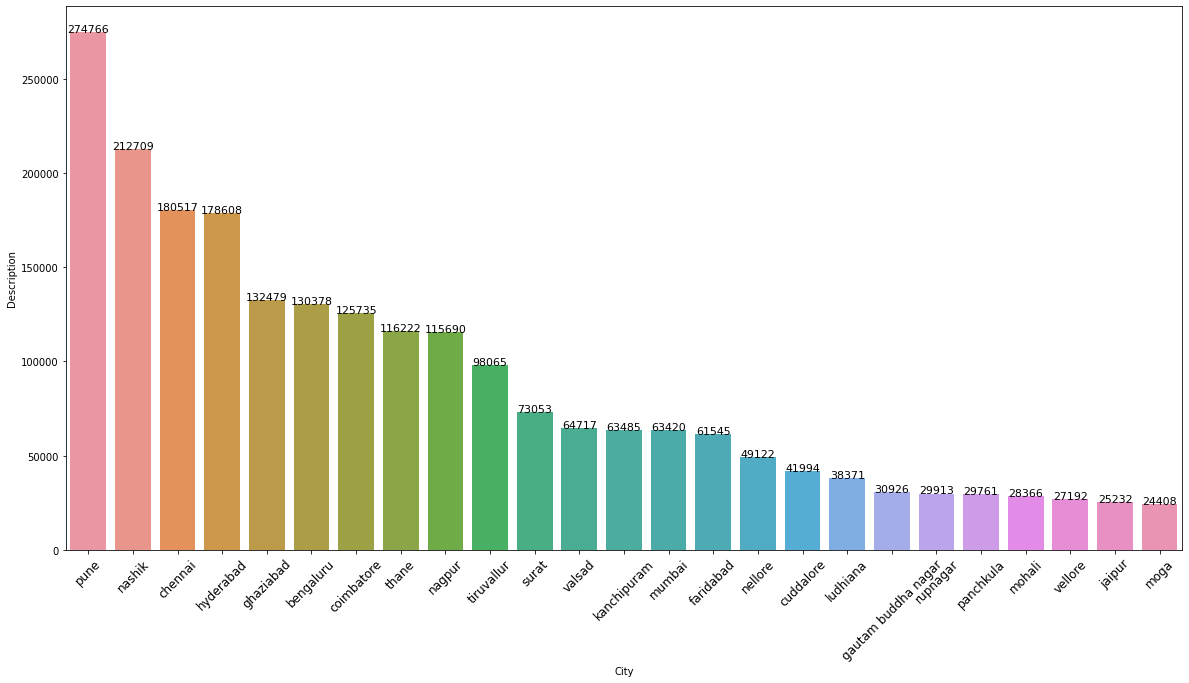

In [15]:
plt.figure(figsize=(20,10))
a = sns.barplot(x='City',y="Description",data=inventory_city[:25])

for index, row in inventory_city[:25].iterrows():
    a.text(row.name,row.Description, round(row.Description,2), color='black', ha="center",fontsize=11)
    
plt.xticks(rotation=45,fontsize=12);

#### So here we can conclude that inventory items are highly used in pune followed by others in the list.

### Frequency of inventory used as per states

In [16]:
inventory_state = merged_jtd_final_customer.groupby(["State"])["Description"].count().sort_values(ascending=False).to_frame()

In [17]:
inventory_state = inventory_state.reset_index()

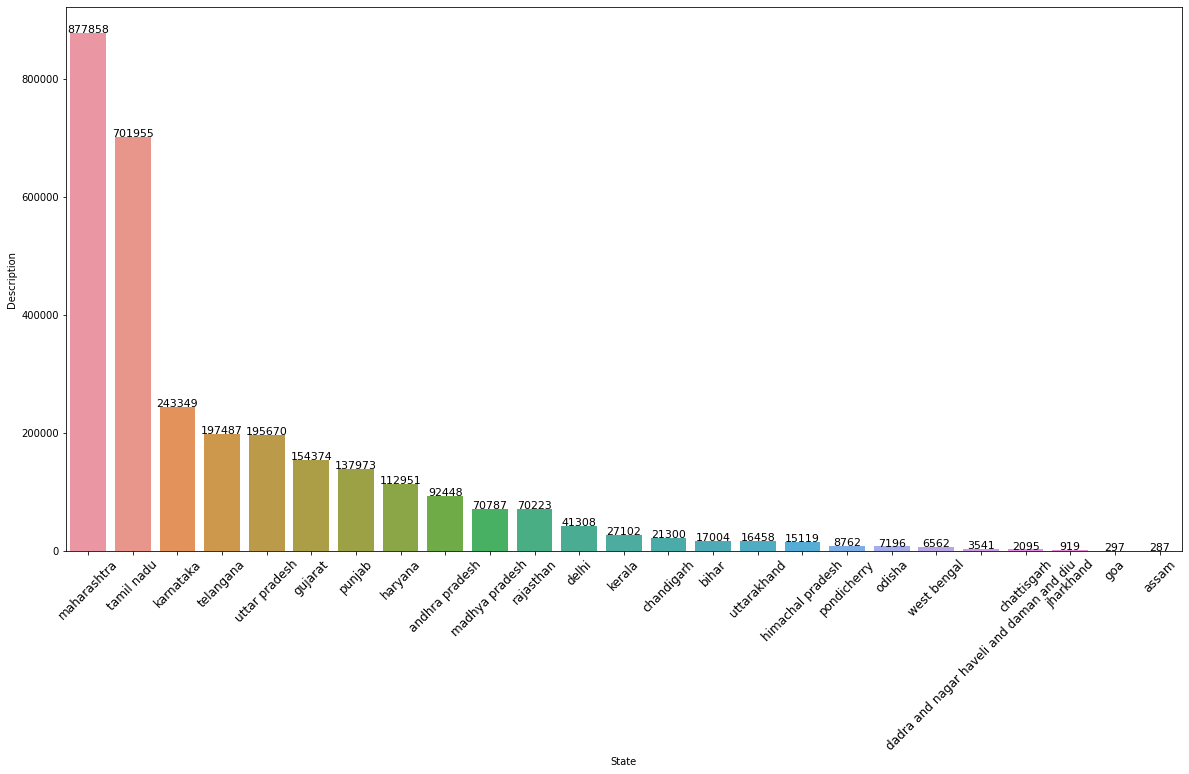

In [18]:
plt.figure(figsize=(20,10))
b = sns.barplot(x='State',y="Description",data=inventory_state[:25])

for index, row in inventory_state[:25].iterrows():
    b.text(row.name,row.Description, round(row.Description,2), color='black', ha="center",fontsize=11)
    
plt.xticks(rotation=45,fontsize=12);

#### Here we can notice that amongst all states frequency of inventory items used is most in Maharashtra and Tamil nadu

### Yealy trend as for usage of inventory items as per state

In [19]:
yearly_state_wise = merged_jtd_final_customer.groupby(["Year","State"])["Description"].count().sort_values(ascending=False).to_frame()

In [20]:
yearly_state_wise = yearly_state_wise.reset_index()

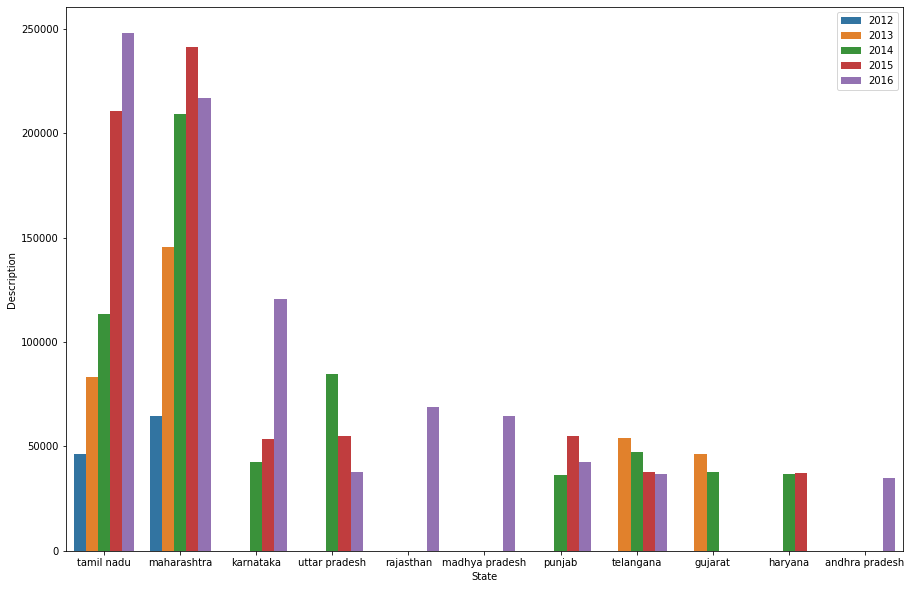

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(x='State',y="Description",hue="Year",data=yearly_state_wise[:30]);
plt.legend(loc='upper right');

### Yealy trend as for usage of inventory items as per Cities

In [22]:
yearly_state_wise_city = merged_jtd_final_customer.groupby(["Year","City"])["Description"].count().sort_values(ascending=False).to_frame()

In [23]:
yearly_state_wise_city = yearly_state_wise_city.reset_index()

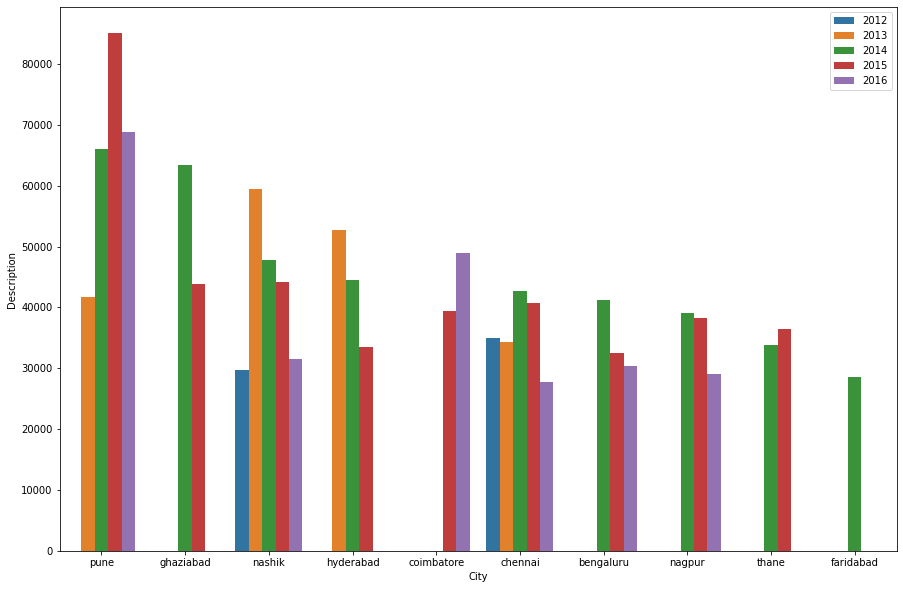

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(x='City',y="Description",hue="Year",data=yearly_state_wise_city[:30]);
plt.legend(loc='upper right');

### Yealy trend as for usage of inventory items as per plants

In [25]:
yearly_state_wise_plant = merged_jtd_final_customer.groupby(["Year","Plant"])["Description"].count().sort_values(ascending=False).to_frame()

In [26]:
yearly_state_wise_plant = yearly_state_wise_plant.reset_index()

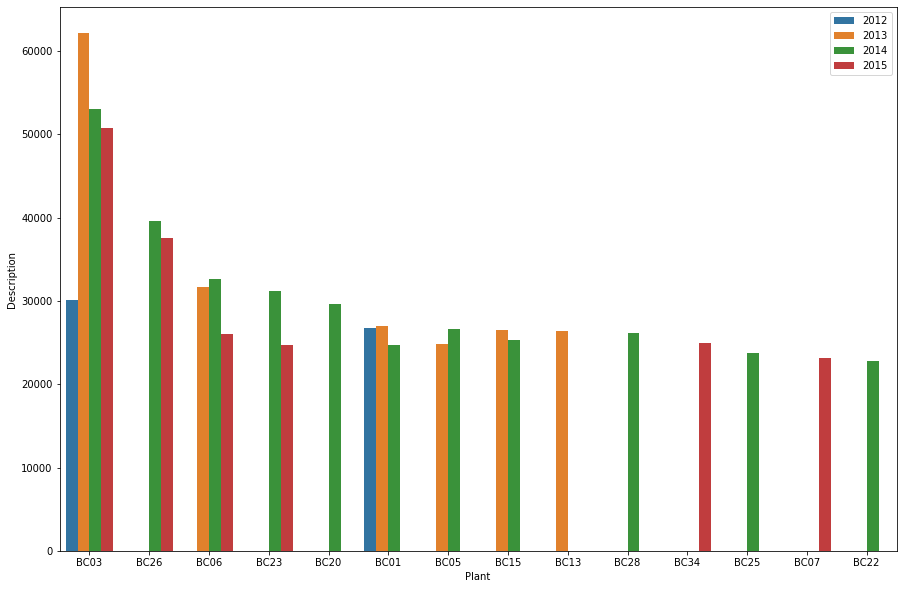

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x='Plant',y="Description",hue="Year",data=yearly_state_wise_plant[:25]);
plt.legend(loc='upper right');

### For year 2016

In [28]:
year2016 = merged_jtd_final_customer[merged_jtd_final_customer["Year"] == 2016]

In [29]:
yearly_2016 = year2016.groupby(["Plant"])["Description"].count().sort_values(ascending=False).to_frame()

In [30]:
yearly_2016 = yearly_2016.reset_index()

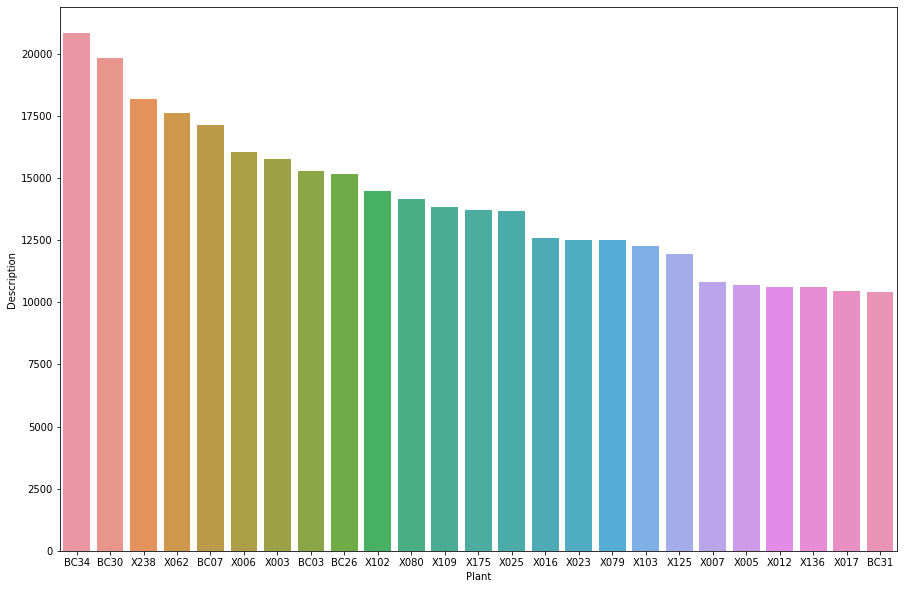

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x ="Plant",y = "Description",data=yearly_2016[:25]);


### Yearly trend of usage of inventory items by makers.

In [32]:
make_yearly_inventory = merged_jtd_final_customer.groupby(["Year","Make"])["Description"].count().sort_values(ascending=False).to_frame()

In [33]:
make_yearly_inventory = make_yearly_inventory.reset_index()

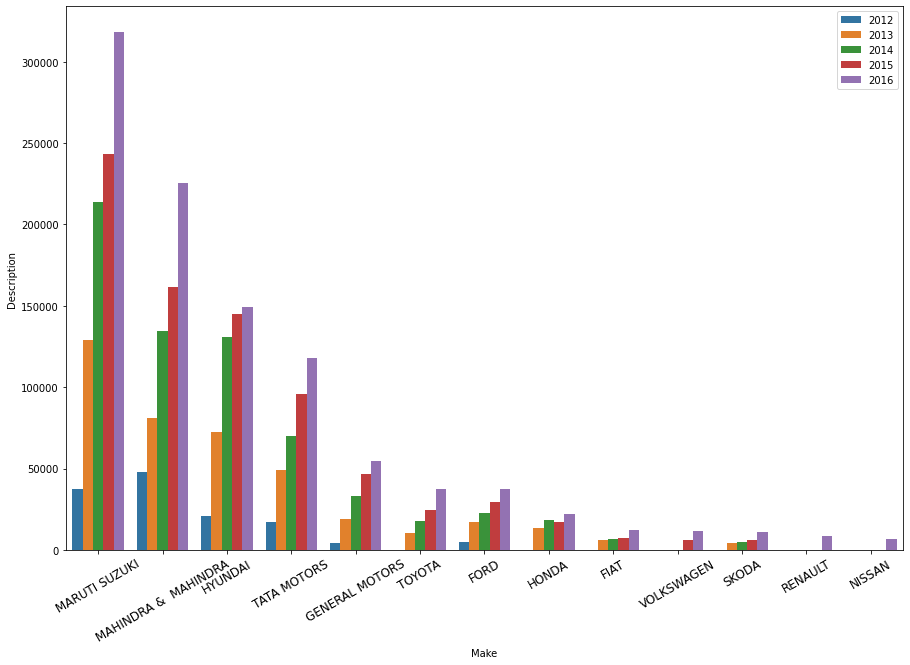

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(x='Make',y="Description",hue="Year",data=make_yearly_inventory[:50]);
plt.legend(loc='upper right');
plt.xticks(rotation=30,fontsize=12);

### Usage of inventory as per order types

In [35]:
merged_jtd_final_customer.head()

Cust Type Customer No. Insurance Company Invoice Date  Job Card No  \
0    Retail        67849               NaN   2015-01-02       168303   
1    Retail        67849               NaN   2015-01-02       168303   
2    Retail        67849               NaN   2015-01-02       168303   
3    Retail        67849               NaN   2015-01-02       168303   
4    Retail        67849               NaN   2015-01-02       168303   

  JobCard Date JobCard Time  KMs Reading  Labour Total            Make  \
0   2014-12-13     14:29:43        49317       1203.14  GENERAL MOTORS   
1   2014-12-13     14:29:43        49317       1203.14  GENERAL MOTORS   
2   2014-12-13     14:29:43        49317       1203.14  GENERAL MOTORS   
3   2014-12-13     14:29:43        49317       1203.14  GENERAL MOTORS   
4   2014-12-13     14:29:43        49317       1203.14  GENERAL MOTORS   

   Misc Total  Model  OSL Total    Order Type  Parts Total  Pin code Plant  \
0         0.0  SPARK     500.06  Paid Service      2348.75    400601  BC01   
1         0.0  SPARK     500.06  Paid Service      2348.75    400601  BC01   
2         0.0  SPARK     500.06  Paid Service      2348.75    400601  BC01   
3         0.0  SPARK     500.06  Paid Service      2348.75    400601  BC01   
4         0.0  SPARK     500.06  Paid Service      2348.75    400601  BC01   

  Plant Name1  Recovrbl Exp Technician Name  Total Amt Wtd Tax.  Total Value  \
0       THANE           0.0          RUPESH             4051.95      4051.95   
1       THANE           0.0          RUPESH             4051.95      4051.95   
2       THANE           0.0          RUPESH             4051.95      4051.95   
3       THANE           0.0          RUPESH             4051.95      4051.95   
4       THANE           0.0          RUPESH             4051.95      4051.95   

   User ID     Invoice_DateTime     JobCard_DateTime  \
0  BC01FS1  2015-01-02 11:30:36  2014-12-13 14:29:43   
1  BC01FS1  2015-01-02 11:30:36  2014-12-13 14:29:43   
2  BC01FS1  2015-01-02 11:30:36  2014-12-13 14:29:43   
3  BC01FS1  2015-01-02 11:30:36  2014-12-13 14:29:43   
4  BC01FS1  2015-01-02 11:30:36  2014-12-13 14:29:43   

                 Service_Time   City        State  Year  Month  \
0  19 days 21:00:53.000000000  thane  maharashtra  2014     12   
1  19 days 21:00:53.000000000  thane  maharashtra  2014     12   
2  19 days 21:00:53.000000000  thane  maharashtra  2014     12   
3  19 days 21:00:53.000000000  thane  maharashtra  2014     12   
4  19 days 21:00:53.000000000  thane  maharashtra  2014     12   

  Business Partner  Partner Type Data Origin  Title Occupation  DBM Order  \
0            71941           1.0        Z007    2.0        NaN     168303   
1            71941           1.0        Z007    2.0        NaN     168303   
2            71941           1.0        Z007    2.0        NaN     168303   
3            71941           1.0        Z007    2.0        NaN     168303   
4            71941           1.0        Z007    2.0        NaN     168303   

   Order Item      Material Labor Value Number                 Description  \
0          10  1EMJ96316634                NaN               BEARING OUTER   
1          20  1EMJ96316635                NaN               BEARING INNER   
2          30  FFSOIL200901                NaN  URANIA SUPREMO CI 4 15W 40   
3          40  1EMJ25183779                NaN                  OIL FILTER   
4          50    GMSZ_MENU1         GMSZPS0007          Paid Service-Minor   

  Item Category  Order Quantity Target quantity UoM  Net value  
0          P002             1.0                  EA     641.86  
1          P002             1.0                  EA     641.86  
2          P002             3.5                   L     970.79  
3          P002             1.0                  EA      94.24  
4          P001             1.0                 MIN     699.08

In [36]:
order_inventory = merged_jtd_final_customer.groupby(["Order Type","Year"])["Description"].count().sort_values(ascending=False).to_frame()

In [37]:
order_inventory = order_inventory.reset_index()

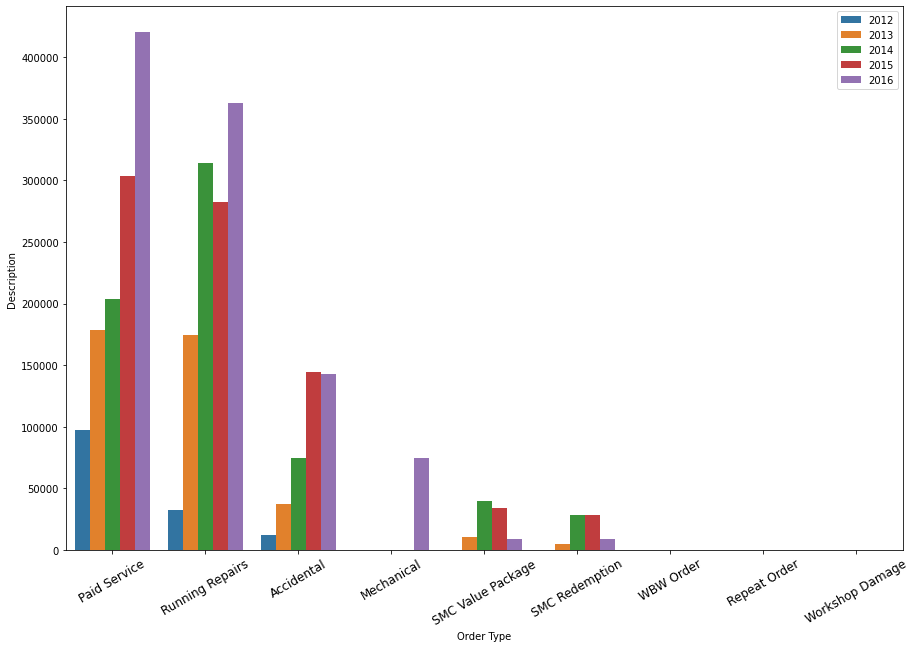

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(x='Order Type',y="Description",hue="Year",data=order_inventory);
plt.legend(loc='upper right');
plt.xticks(rotation=30,fontsize=12);

### Inventory used as per customer category

In [39]:
cust_inventory = merged_jtd_final_customer.groupby(["Cust Type","Year"])["Description"].count().sort_values(ascending=False).to_frame()

In [40]:
cust_inventory = cust_inventory.reset_index()

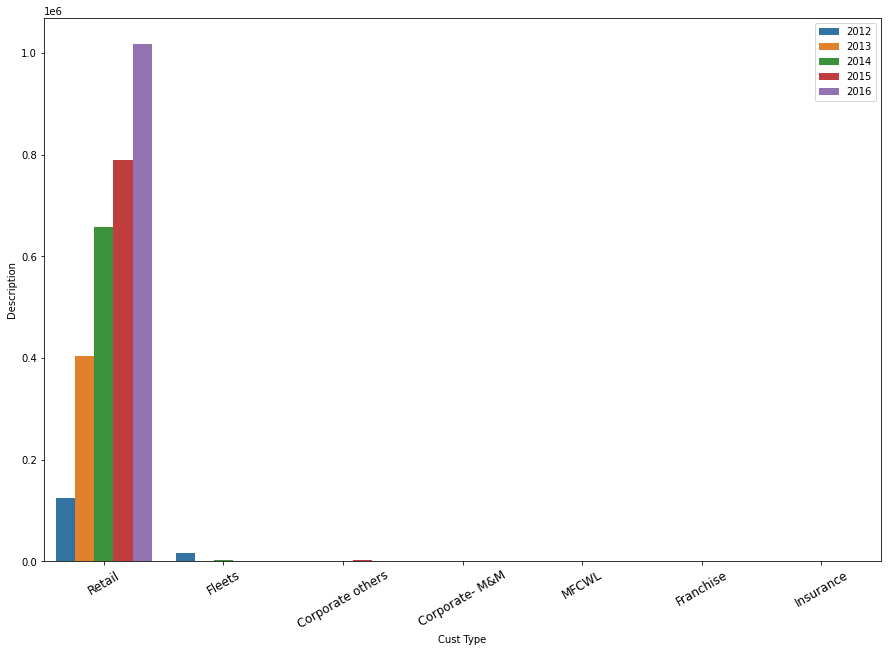

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(x='Cust Type',y="Description",hue="Year",data=cust_inventory);
plt.legend(loc='upper right');
plt.xticks(rotation=30,fontsize=12);

### Revenue generated over the years by inventory materials

In [42]:
inventory_demand = merged_jtd_final_customer.groupby(["Description","Year"])["Total Amt Wtd Tax."].sum().sort_values(ascending=False).to_frame()

In [43]:
inventory_demand = inventory_demand.reset_index()

In [44]:
fig = px.bar(inventory_demand[:25], x='Description', y='Total Amt Wtd Tax.',color="Year")
fig.show()

## Demand related analysis for inventory materials

In [31]:
Description_year = merged_jtd_final_customer.groupby(["Description","Year"])["Description"].count().sort_values(ascending=False).to_frame().rename(columns={"Description":"counts"})

In [32]:
Description_year = Description_year.reset_index()

In [36]:
Description_year

Description  Year  counts
0                  MISC_OTHER CHARGES  2016   47901
1                             WASHING  2016   39093
2          URANIA SUPREMO CI 4 15W 40  2015   36959
3                  Paid Service-Minor  2015   35687
4                  MISC_OTHER CHARGES  2015   34679
...                               ...   ...     ...
91225               CLUTCH SET TAVERA  2013       1
91226               CLUTCH SET TAVERA  2014       1
91227     GASKET KIT –ENGINE OVERHAUL  2016       1
91228  SPRING FOR SYNCHRO PACK NGT520  2015       1
91229        STRUT REAR- GAS IKON (P)  2015       1

[91230 rows x 3 columns]

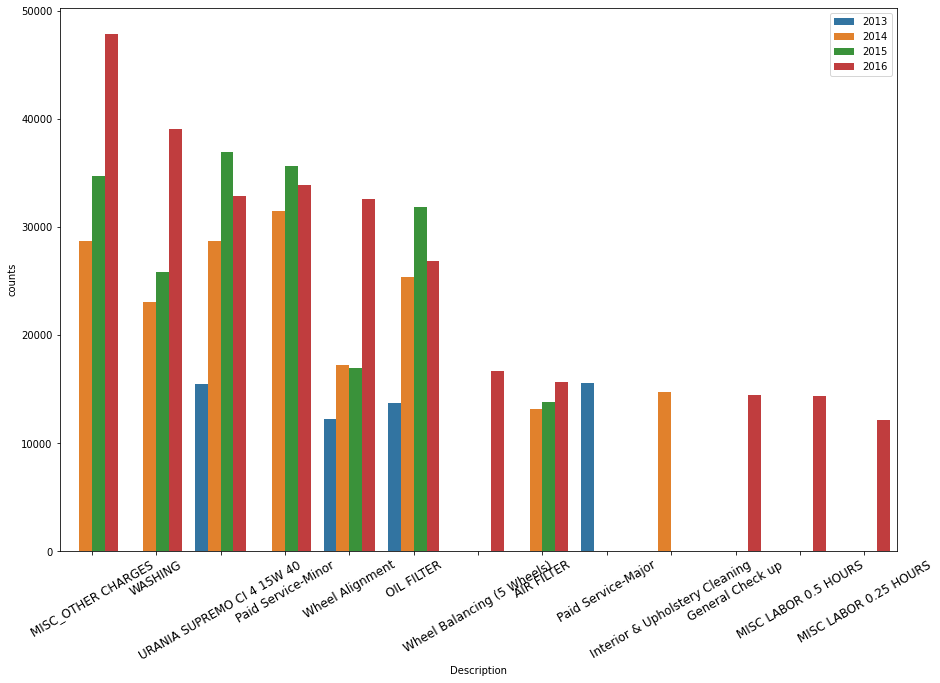

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(x='Description',y="counts",hue="Year",data=Description_year[:30]);
plt.legend(loc='upper right');
plt.xticks(rotation=30,fontsize=12);

#### As we can observe the need for Misc_other charges , washing and so on are increasing throughout the year . So we should focus on keeping these materials in stocks as demand seems to be higher

## Requirement of inventory materials as per zones

In [45]:
zone1 =['uttar pradesh','delhi','himachal pradesh','punjab','uttarakhand','haryana','jammu & kashmir','chandigarh']
filter1=merged_jtd_final_customer['State'].isin(zone1)
north_zone=merged_jtd_final_customer.loc[filter1]

zone2=['maharashtra','gujarat','dadra and nagar haveli and daman and diu','goa','rajasthan']
filter2=merged_jtd_final_customer['State'].isin(zone2)
west_zone=merged_jtd_final_customer.loc[filter2]


zone3=['karnataka','tamil nadu','andhra pradesh','telangana','kerala','pondicherry','lakshadweep']
filter3=merged_jtd_final_customer['State'].isin(zone3)
south_zone=merged_jtd_final_customer.loc[filter3]


zone4=['west bengal','odisha','bihar','jharkhand','arunachal pradesh','assam',]
filter4=merged_jtd_final_customer['State'].isin(zone4)
east_zone=merged_jtd_final_customer.loc[filter4]


zone5=['madhya pradesh','chattisgarh']
filter5=merged_jtd_final_customer['State'].isin(zone5)
central_zone=merged_jtd_final_customer.loc[filter5]

### North zone

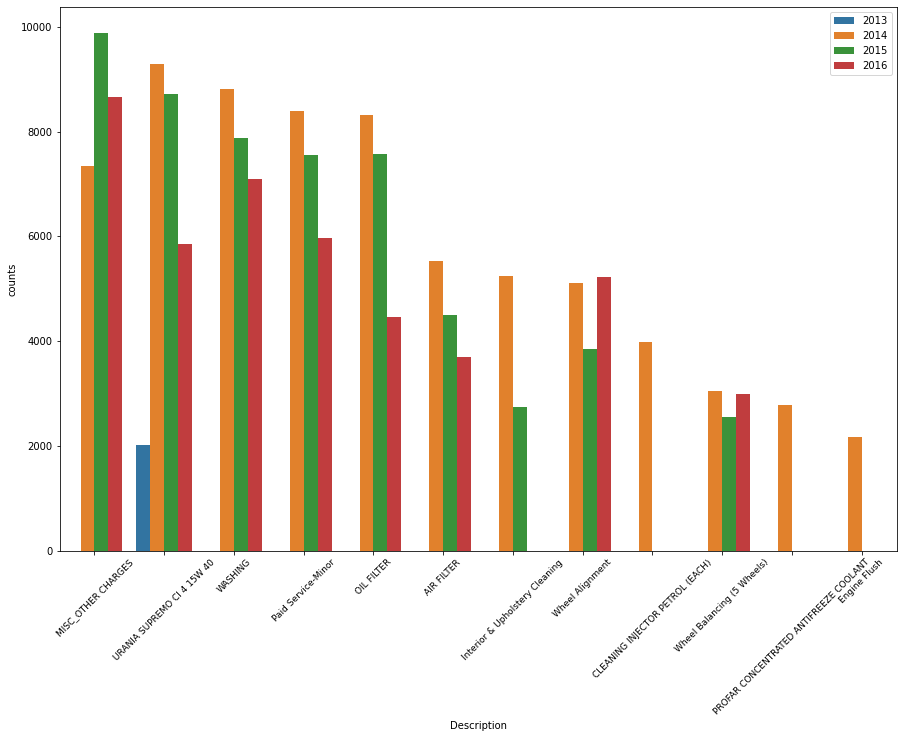

In [46]:
inv_nz = north_zone.groupby(["Description","Year"])["Description"].count().sort_values(ascending=False).to_frame().rename(columns={"Description":"counts"})
inv_nz = inv_nz.reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='Description',y="counts",hue="Year",data=inv_nz[:30]);
plt.legend(loc='upper right');
plt.xticks(rotation=45,fontsize=9);

### West Zone

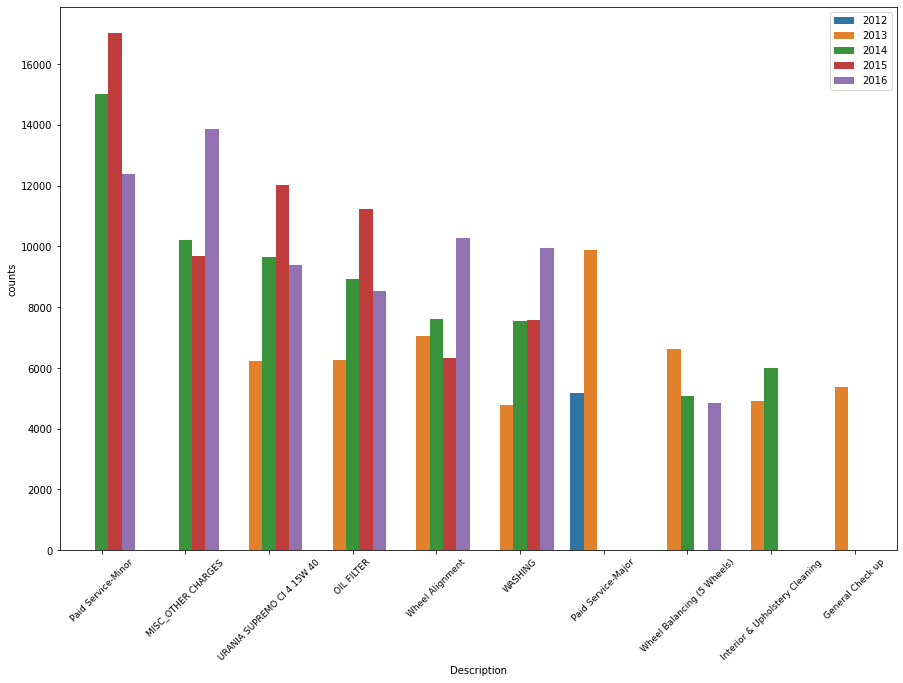

In [46]:
inv_wz = west_zone.groupby(["Description","Year"])["Description"].count().sort_values(ascending=False).to_frame().rename(columns={"Description":"counts"})
inv_wz = inv_wz.reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='Description',y="counts",hue="Year",data=inv_wz[:30]);
plt.legend(loc='upper right');
plt.xticks(rotation=45,fontsize=9);

### East zone

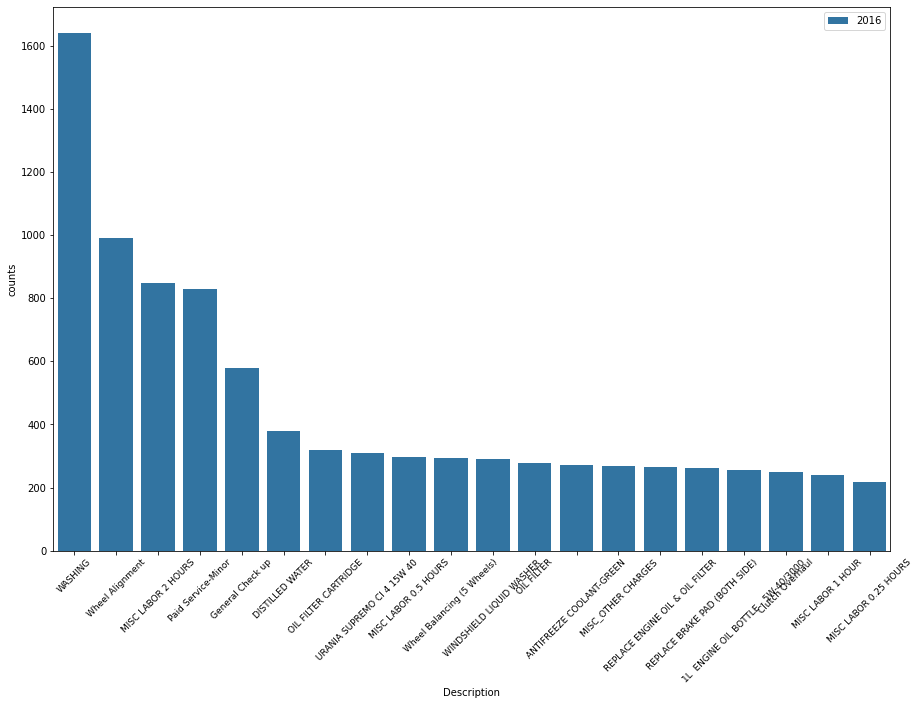

In [48]:
inv_ez = east_zone.groupby(["Description","Year"])["Description"].count().sort_values(ascending=False).to_frame().rename(columns={"Description":"counts"})
inv_ez = inv_ez.reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='Description',y="counts",hue="Year",data=inv_ez[:20]);
plt.legend(loc='upper right');
plt.xticks(rotation=45,fontsize=9);

### South Zone

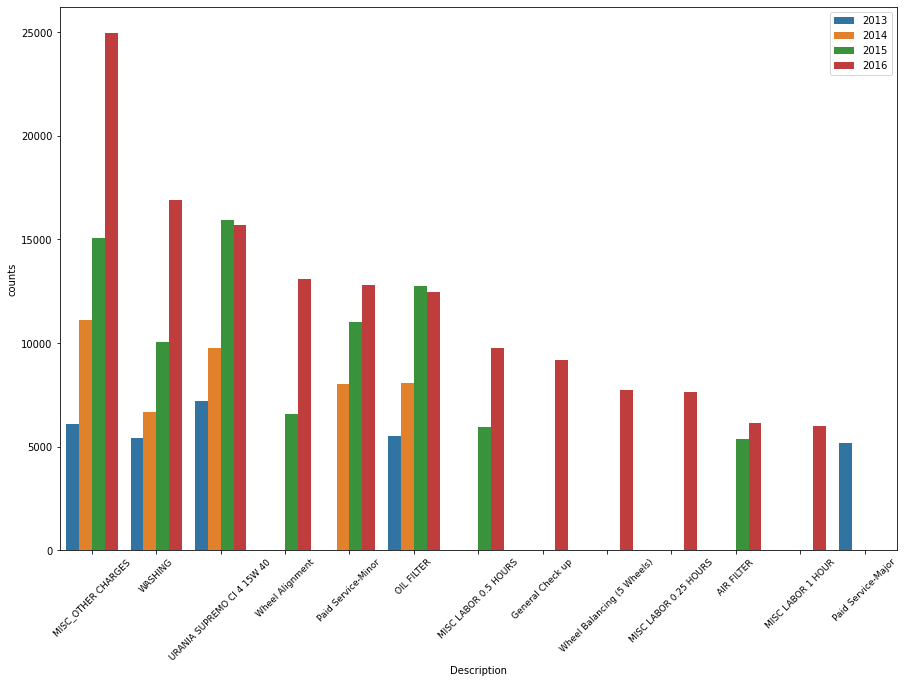

In [49]:
inv_sz = south_zone.groupby(["Description","Year"])["Description"].count().sort_values(ascending=False).to_frame().rename(columns={"Description":"counts"})
inv_sz = inv_sz.reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='Description',y="counts",hue="Year",data=inv_sz[:30]);
plt.legend(loc='upper right');
plt.xticks(rotation=45,fontsize=9);

### Central Zone

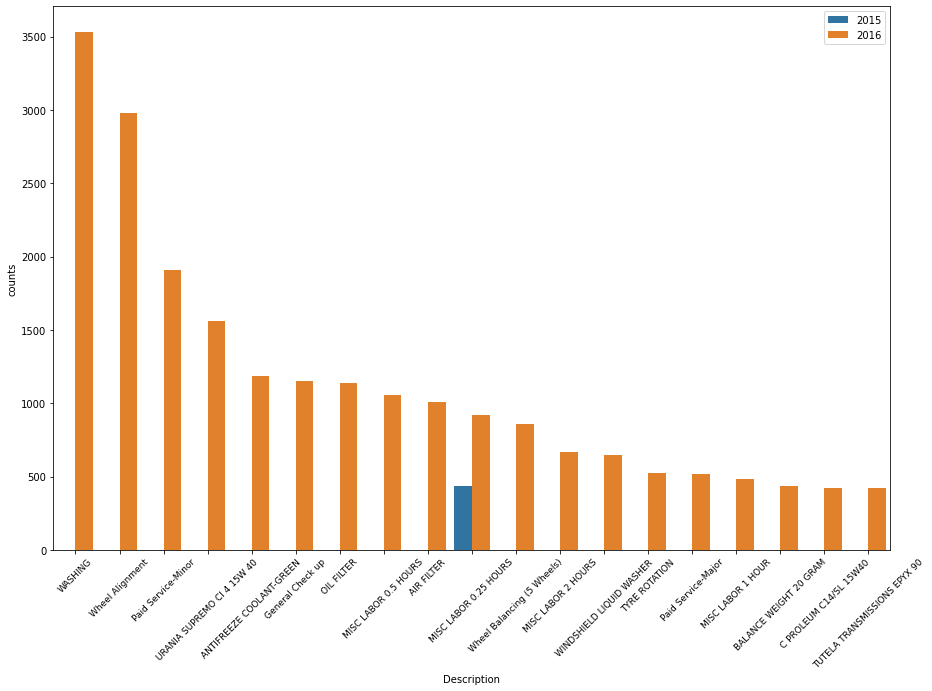

In [51]:
inv_cz = central_zone.groupby(["Description","Year"])["Description"].count().sort_values(ascending=False).to_frame().rename(columns={"Description":"counts"})
inv_cz = inv_cz.reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='Description',y="counts",hue="Year",data=inv_cz[:20]);
plt.legend(loc='upper right');
plt.xticks(rotation=45,fontsize=9);